In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [106]:
df = pd.read_csv('data_ex2.txt')

value_list = df['data'].values.tolist()

-0.99709334 9.9108866


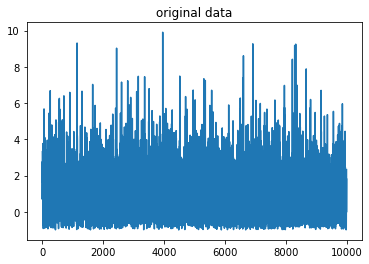

In [34]:
plt.plot(value_list)
plt.title('original data')
plt.show()

## Cleaning data by using moving average method

We have got series of X data $$X_1, X_2, ..., X_n$$

MA method:
$T_t = \frac{1}{2p+1} \sum_{j=-p}^{p}X_{t+j}$  
$ t = p+1, \cdots, n-p $

$value = 2p+1$

For example:
$3MA$

$T_2 = \frac{1}{3}(X_1+X_2+X_3)$

$T_3 = \frac{1}{3}(X_1+X_2+X_3)$

$ \vdots$

$T_{n-1} = \frac{1}{3}(X_{n-2}+X_{n-1}+X_3{n})$


In [101]:
def cleaning(data, value):
    
    n = len(data)

    if value % 2 != 1 :
        print('Input odd number to "value"')
        return False

    elif n < value:
        print('value is to big')
        return False
    
    cleaned_data = np.zeros(n)
    cleaned_data[0] = data[0]
    cleaned_data[n-1] = data[n-1]

    p = int((value - 1)/2)
    
    for i in range(n-p*2):
        cleaned_data[i+1] = (sum(data[i:i+p*2+1]))/value
        
    return(cleaned_data)

In [135]:
cleaned_11 = cleaning(value_list, 11)
cleaned_25 = cleaning(value_list, 25)


In [142]:
test_value = 49
cleaned_test = cleaning(value_list, test_value)

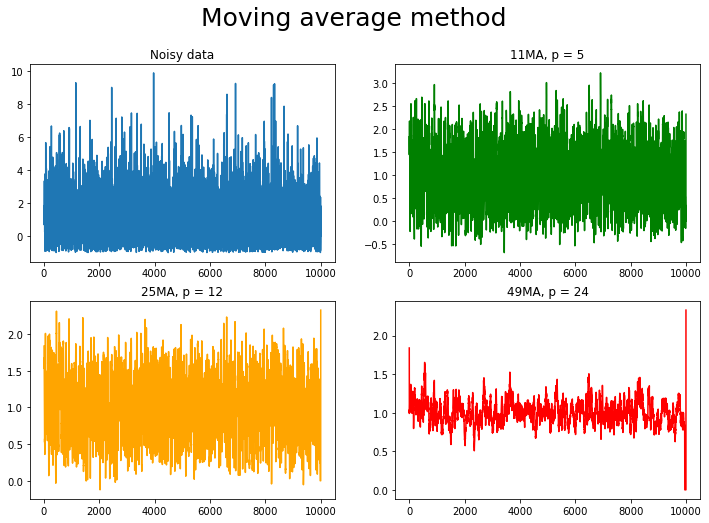

In [151]:
fig, axs = plt.subplots(2,2, figsize = (12,8))

fig.suptitle('Moving average method', size = 25 )

axs[0, 0].plot(value_list)
axs[0, 0].set_title('Noisy data')

axs[0, 1].plot(cleaned_11, 'g')
axs[0, 1].set_title('11MA, p = 5')

axs[1, 0].plot(cleaned_25, 'orange')
axs[1, 0].set_title('25MA, p = 12')

axs[1, 1].plot(cleaned_test, 'red')
axs[1, 1].set_title(f'{test_value}MA, p = {int((test_value-1)/2)}')
plt.show()
